In [2]:
# Import necessary libraries
import pandas as pd
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

In [3]:
# Load data from the Excel file
df = pd.read_excel('Thesis_V6.xlsx')

In [4]:
# Visualizing the first 6 rows with column head
df.head(6) 

,FID,Lat,Long,GR (Recharge),Precipitation,ET_pot,Prec_seasonality,Temp_seasonality,Aridity,DEM,...,Landuse,Rock type,Recharge fraction,a,alpha,b,beta,scale,Location,Duration(24hrs)
0,0,37.3,-80.1,27.0,998,1213,11,7894,1.135838,373,...,14,13,0.027054,10.216609,-0.56913,10.27091,-0.725667,0.948149,0.979379,0.120018
1,1,46.3,-119.9,119.0,191,1118,43,7596,5.994595,278,...,12,14,0.623037,10.216609,-0.56913,10.27091,-0.725667,0.948149,0.979379,0.120018
2,2,31.8,-110.8,3.0,503,1470,73,6429,2.644161,1299,...,6,1,0.005964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,51.1,-1.3,207.0,760,708,20,4686,0.946237,67,...,12,5,0.272368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,51.1,-1.3,300.0,760,708,20,4686,0.946237,67,...,12,5,0.394737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,38.1,114.4,168.0,515,1159,112,10387,2.290514,79,...,12,14,0.326214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Removing any rows with NaN values
df.dropna(inplace=True)

In [6]:
# Extract values from the columns
a = df['a']
alpha = df['alpha']
b = df['b']
beta = df['beta']
duration_24hrs = df['Duration(24hrs)']  # Fixed variable name
scale = df['scale']
recharge_fraction = df['Recharge fraction']

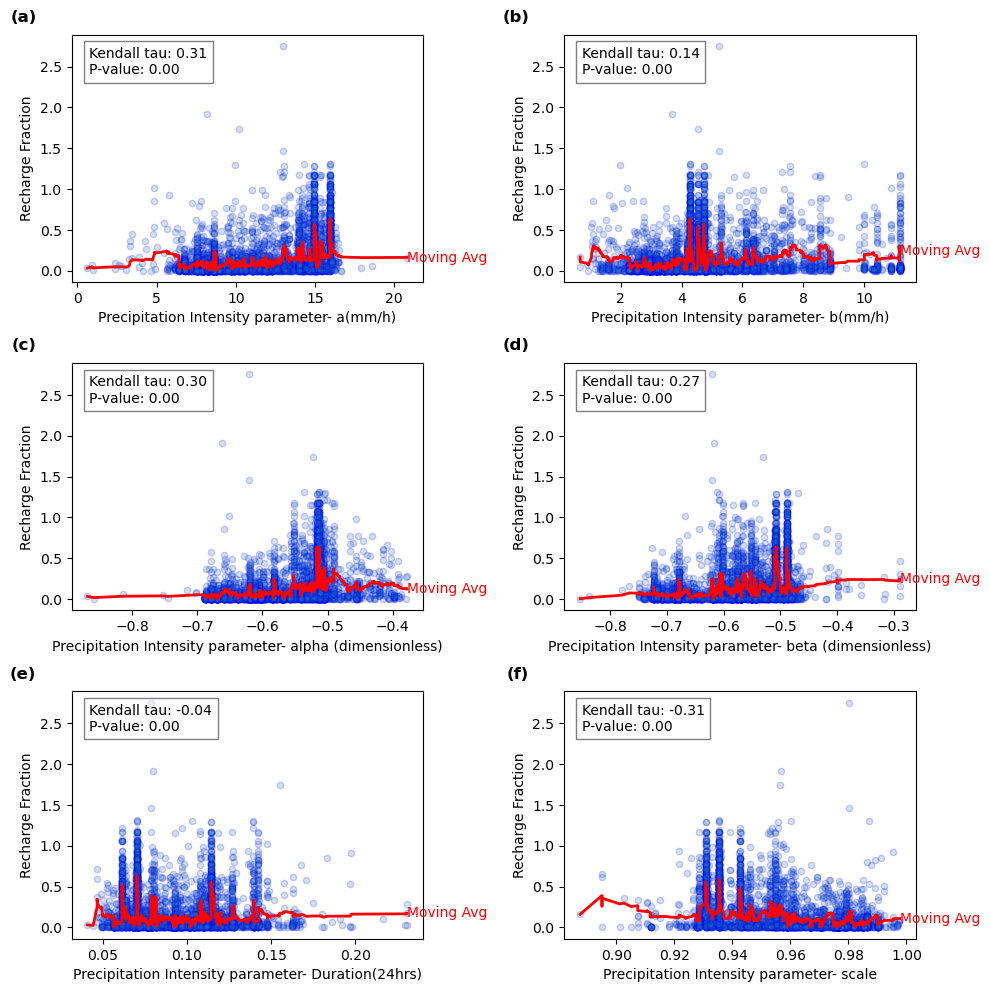

In [10]:
# Create subplot layout for 6 precipitation intensity variables
fig, axes = plt.subplots(3, 2, figsize=(10, 10)) 
# Flatten for making indexing easier
axes = axes.flatten() 

# Define the plot data and labels of six variables
plot_data = [
    (a, 'Precipitation Intensity parameter- a(mm/h)', '(a)'),
    (b, 'Precipitation Intensity parameter- b(mm/h)', '(b)'),
    (alpha, 'Precipitation Intensity parameter- alpha (dimensionless)', '(c)'),
    (beta, 'Precipitation Intensity parameter- beta (dimensionless)', '(d)'),
    (duration_24hrs, 'Precipitation Intensity parameter- Duration(24hrs)', '(e)'),
    (scale, 'Precipitation Intensity parameter- scale', '(f)'),
]

# Window size for moving average
window_size = 50

# Make loop through data and create scatter plots for different variables
for i, (x_data, xlabel, subplot_label) in enumerate(plot_data):
    ax = axes[i]
    tau, p_value_kendall = kendalltau(x_data, recharge_fraction)

    ax.scatter(x_data, recharge_fraction, marker='o', s=20, alpha=0.2, edgecolors='b')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Recharge Fraction')

    sorted_df = pd.DataFrame({'x': x_data, 'Recharge Fraction': recharge_fraction}).sort_values(by='x')
    sorted_df['SMA'] = sorted_df['Recharge Fraction'].rolling(window=window_size, min_periods=1).mean()

    ax.plot(sorted_df['x'], sorted_df['SMA'], color='red', linewidth=2, label='Moving Average')

    last_x = sorted_df['x'].iloc[-1]
    last_y = sorted_df['SMA'].iloc[-1]
    
    # Level moving average line
    ax.text(last_x, last_y, "Moving Avg", color='red', fontsize=10, verticalalignment='center')
    
    # Calculate Kendall tau and P-value and make it witin two digit 
    textstr = f"Kendall tau: {tau:.2f}\nP-value: {p_value_kendall:.2f}"
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(-0.1, 1.1, subplot_label, transform=ax.transAxes, fontsize=12, fontweight='bold',
            va='top', ha='right')
    
# Make layout tight
plt.tight_layout()

# Show the plot
plt.show()
